## 2.2 Definição de um baseline usando ferramentas já existentes

### Bibliotecas

In [8]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Processamento de texto
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import stanza

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Carregar o ficheiro

In [9]:
#Upload dos datasets que estão na mesma pasta do script
test_df = pd.read_csv("amazon_reviews_test.csv", encoding = "utf-8")

### TextBlob

In [ ]:
# Função para analisar sentimento com TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return "positive" if analysis.sentiment.polarity > 0 else "negative"

# Previsões temporárias para o conjunto de teste
test_textblob_preds = test_df['review'].apply(get_textblob_sentiment)

# Avaliação de TextBlob (Teste)
print("\nTextBlob Sentiment Analysis:")
print("Accuracy:", accuracy_score(test_df['sentiment'], test_textblob_preds))
print(classification_report(test_df['sentiment'], test_textblob_preds))


TextBlob Sentiment Analysis:
Accuracy: 0.7691352916839057
              precision    recall  f1-score   support

    negative       0.73      0.40      0.51       741
    positive       0.78      0.93      0.85      1676

    accuracy                           0.77      2417
   macro avg       0.75      0.67      0.68      2417
weighted avg       0.76      0.77      0.75      2417



### VADER

In [ ]:
# Função para analisar sentimento com VADER
vader_analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)['compound']
    return "positive" if score > 0 else "negative"

# Previsões temporárias para o conjunto de teste
test_vader_preds = test_df['review'].apply(get_vader_sentiment)

# Avaliação de VADER (Teste)
print("\nVADER Sentiment Analysis:")
print("Accuracy:", accuracy_score(test_df['sentiment'], test_vader_preds))
print(classification_report(test_df['sentiment'], test_vader_preds))


VADER Sentiment Analysis:
Accuracy: 0.7931319817956144
              precision    recall  f1-score   support

    negative       0.80      0.43      0.56       741
    positive       0.79      0.95      0.86      1676

    accuracy                           0.79      2417
   macro avg       0.80      0.69      0.71      2417
weighted avg       0.79      0.79      0.77      2417



### Stanza

In [12]:
# Função para analisar sentimento com Stanza
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
def stanza_sentiment(text):
    doc = stanza_nlp(text)
    avg_score = np.mean([s.sentiment for s in doc.sentences])
    return 'positive' if avg_score > 0.5 else 'negative'

# Previsões temporárias para o conjunto de teste
test_df['stanza_pred'] = test_df['review'].apply(stanza_sentiment)

# Avaliação de Stanza
print("\nStanza Sentiment Analysis:")
print("Accuracy:", accuracy_score(test_df['sentiment'], test_df['stanza_pred']))
print(classification_report(test_df['sentiment'], test_df['stanza_pred']))


2025-04-26 20:39:31 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-04-26 20:39:31 INFO: Downloaded file to /Users/medaracaityte/stanza_resources/resources.json
2025-04-26 20:39:31 WARNING: Language en package default expects mwt, which has been added
2025-04-26 20:39:32 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | combined       |
| mwt       | combined       |
| sentiment | sstplus_charlm |

2025-04-26 20:39:32 INFO: Using device: cpu
2025-04-26 20:39:32 INFO: Loading: tokenize
2025-04-26 20:39:32 INFO: Loading: mwt
2025-04-26 20:39:32 INFO: Loading: sentiment
2025-04-26 20:39:33 INFO: Done loading processors!



Stanza Sentiment Analysis:
Accuracy: 0.7898220935043442
              precision    recall  f1-score   support

    negative       0.80      0.42      0.55       741
    positive       0.79      0.95      0.86      1676

    accuracy                           0.79      2417
   macro avg       0.79      0.69      0.71      2417
weighted avg       0.79      0.79      0.77      2417



### Gráficos

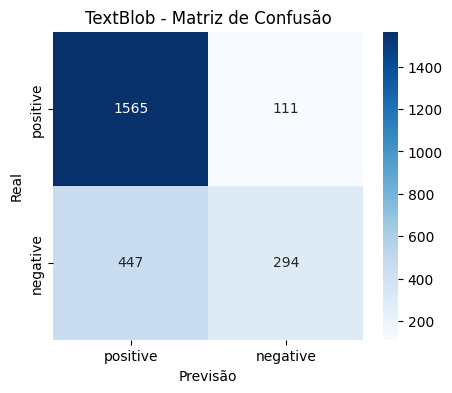

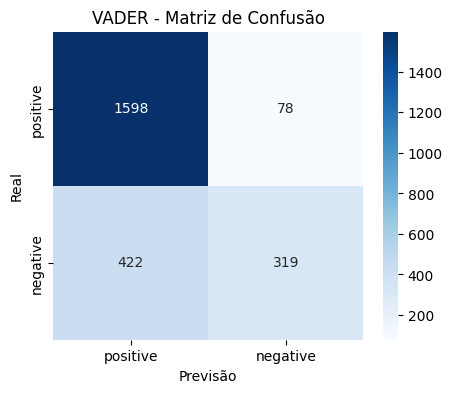

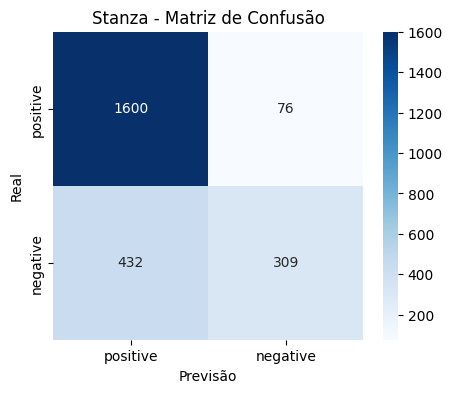

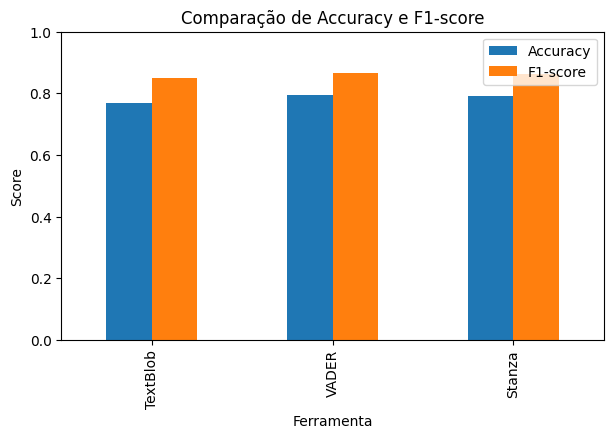

In [13]:
# Função para o gráfico de matriz de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=['positive', 'negative'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['positive', 'negative'], 
                yticklabels=['positive', 'negative'])
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

plot_confusion(test_df['sentiment'], test_textblob_preds, "TextBlob - Matriz de Confusão")
plot_confusion(test_df['sentiment'], test_vader_preds, "VADER - Matriz de Confusão")
plot_confusion(test_df['sentiment'], test_df['stanza_pred'], "Stanza - Matriz de Confusão")

# Gráfico de barras para comparação de métricas
results = {
    'Ferramenta': ['TextBlob', 'VADER', 'Stanza'],
    'Accuracy': [
        accuracy_score(test_df['sentiment'], test_textblob_preds),
        accuracy_score(test_df['sentiment'], test_vader_preds),
        accuracy_score(test_df['sentiment'], test_df['stanza_pred'])
    ],
    'F1-score': [
        f1_score(test_df['sentiment'], test_textblob_preds, pos_label='positive'),
        f1_score(test_df['sentiment'], test_vader_preds, pos_label='positive'),
        f1_score(test_df['sentiment'], test_df['stanza_pred'], pos_label='positive')
    ]
}
results_df = pd.DataFrame(results)

results_df.set_index('Ferramenta')[['Accuracy', 'F1-score']].plot(kind='bar', ylim=(0,1), figsize=(7,4))
plt.title('Comparação de Accuracy e F1-score')
plt.ylabel('Score')
plt.show()
